# Car price prediction
Using linear regression

In [ ]:
# import all dependencies
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
data = pd.read_csv('/content/CarPrice_Assignment.csv')

The dataset is obtained from Kaggle 

In [ ]:
# printing the first 5 rows
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# Checking for missing values
data.isnull().sum()*100/data.shape[0]

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

Here we find out that there are no missing values

In [ ]:
data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [ ]:
data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [ ]:
data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [ ]:
data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
data.shape

(205, 26)

Checking correlations

In [ ]:
corr_matrix = data.corr()

In [ ]:
corr_matrix['price'].sort_values(ascending = False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

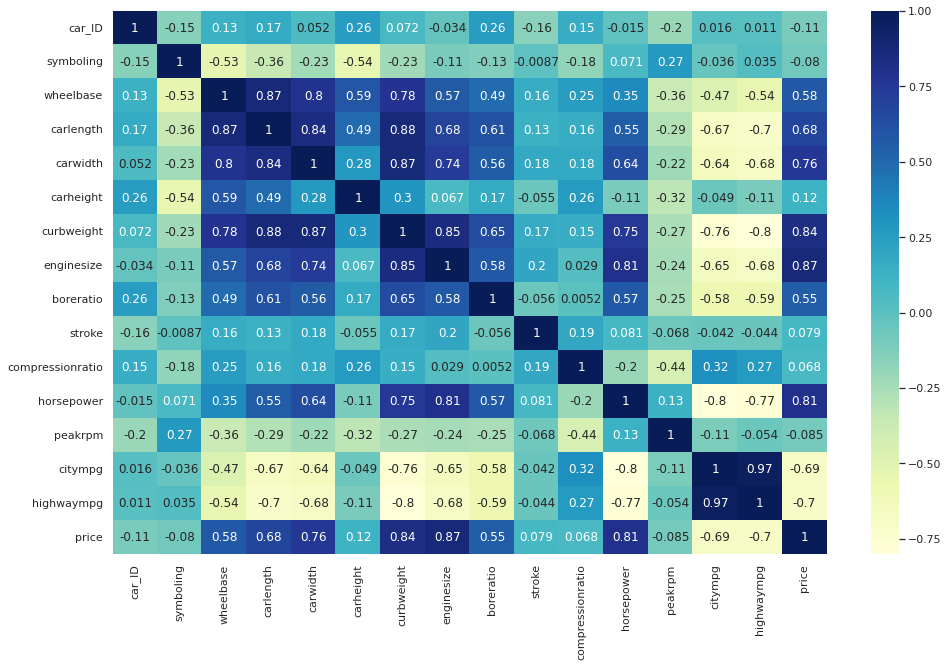

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot = True, cmap= "YlGnBu")
plt.show()

Here we find out that the feature enginesize has maximum correlation with are target value

Scaling down variables with a large range 

In [ ]:
data['dimensions'] = data['carlength']* data['carwidth']* data['carheight']

In [ ]:
zscore = (data['dimensions']-data['dimensions'].mean())/data['dimensions'].std()

In [ ]:
zscore

0     -1.141401
1     -1.141401
2     -0.391712
3      0.202580
4      0.226716
         ...   
200    1.299249
201    1.286062
202    1.299249
203    1.299249
204    1.299249
Name: dimensions, Length: 205, dtype: float64

In [ ]:
data['dimensions']

0      528019.904
1      528019.904
2      587592.640
3      634816.956
4      636734.832
          ...    
200    721961.760
201    720913.920
202    721961.760
203    721961.760
204    721961.760
Name: dimensions, Length: 205, dtype: float64

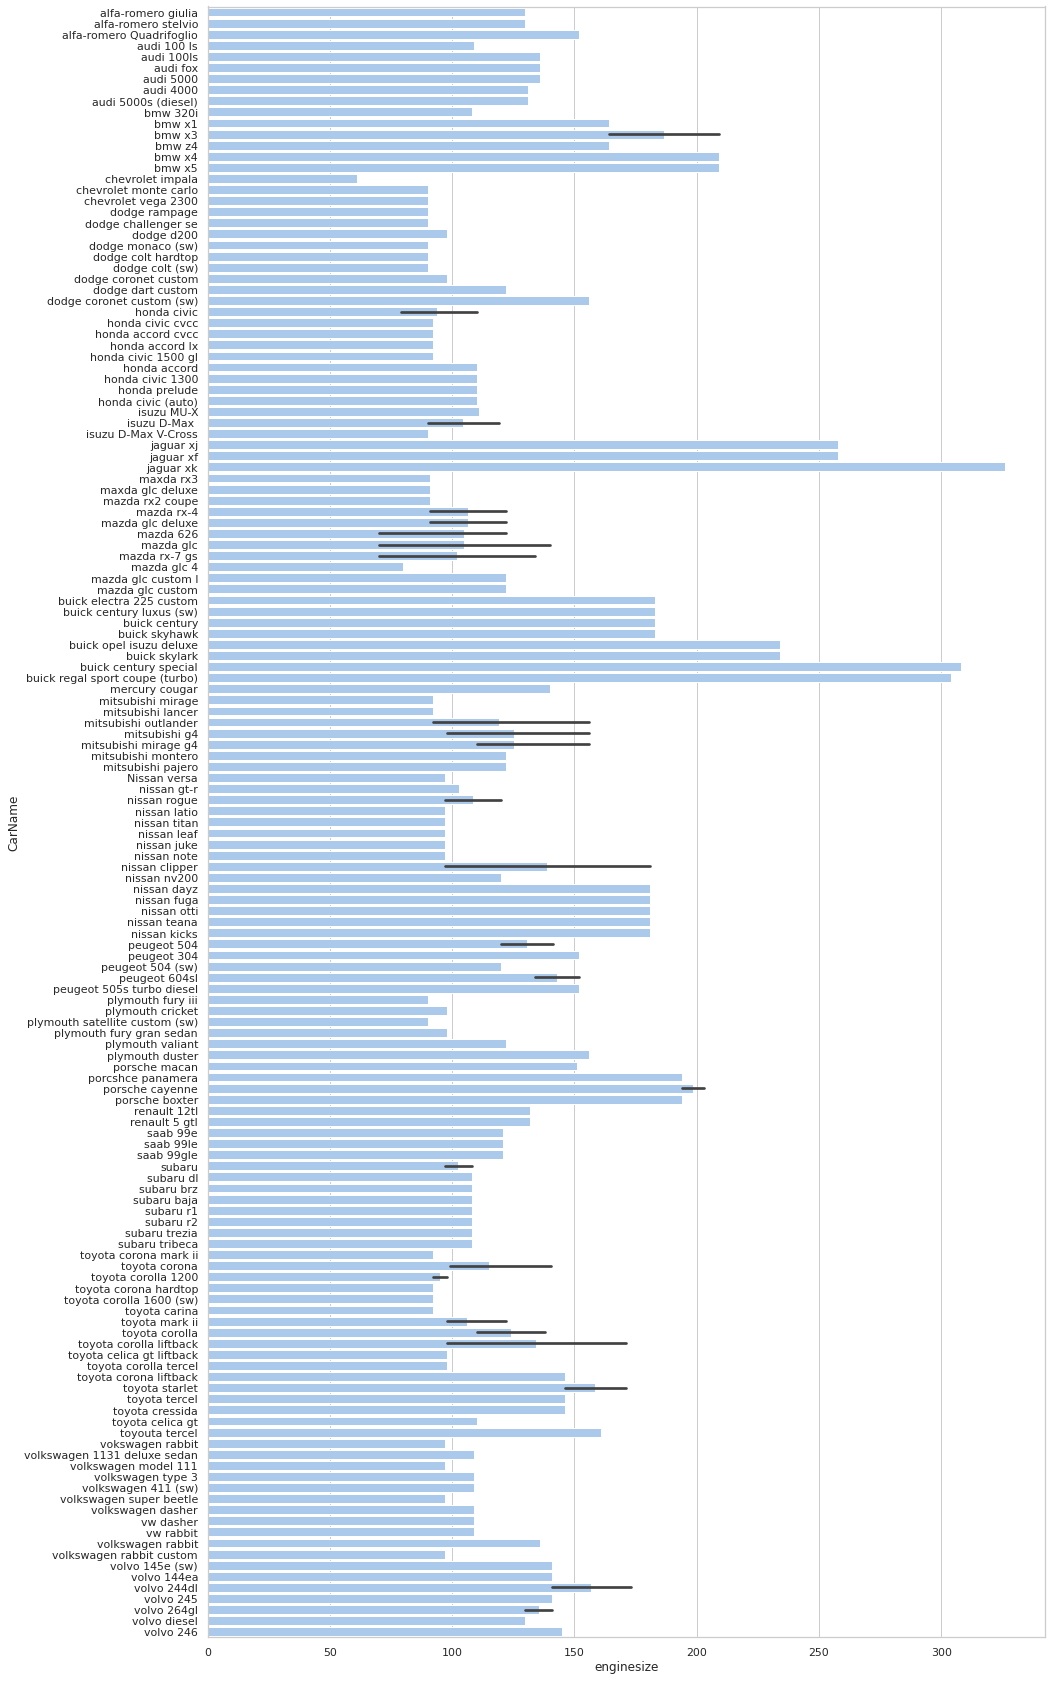

In [ ]:
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15,30))
sns.set_color_codes("pastel")
sns.barplot(x="enginesize", y="CarName", data=data,
            label="Car names", color="b")


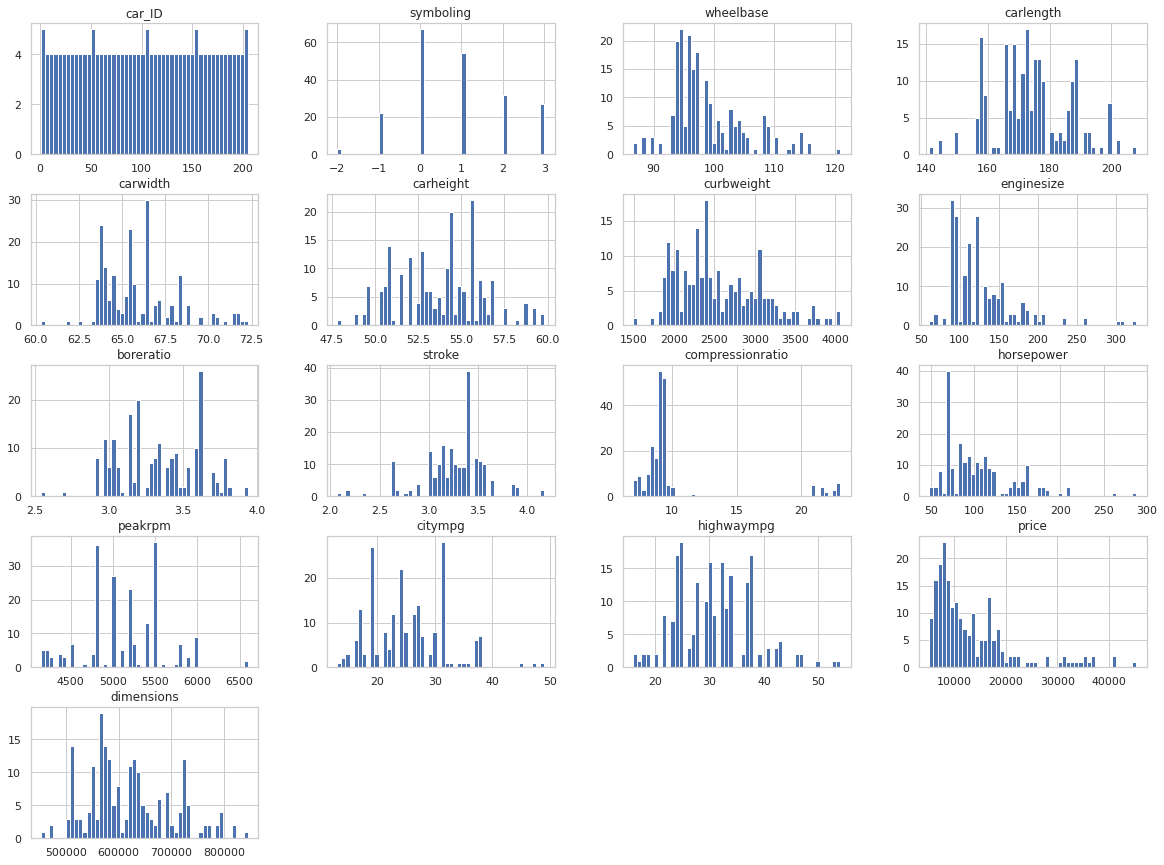

In [ ]:
data.hist(bins=50,figsize=(20,15))
plt.show()


In [ ]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dimensions,engine_cat
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904,5
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904,5
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640,5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956,5
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832,5


In [ ]:
data.groupby('compressionratio').compressionratio.count()

compressionratio
7.00      7
7.50      5
7.60      4
7.70      2
7.80      1
8.00      8
8.10      2
8.30      3
8.40      5
8.50     14
8.60      5
8.70      9
8.80      3
9.00     46
9.10      1
9.20      8
9.30     11
9.31      1
9.40     26
9.41      1
9.50     13
9.60      5
10.00     3
10.10     1
11.50     1
21.00     5
21.50     4
21.90     1
22.00     1
22.50     3
22.70     1
23.00     5
Name: compressionratio, dtype: int64

In [ ]:
data.groupby

<bound method DataFrame.groupby of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible

Spliting the company and the model from the CarName Column 

In [ ]:
data[['Company','Model']] = data.pop('CarName').str.split(' ', n=1, expand=True)

In [ ]:
data.Company

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: Company, Length: 205, dtype: object

In [ ]:
data.groupby('Company').Company.count()

Company
Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: Company, dtype: int64

replacing the car's names with revelant names.

In [ ]:
data['Company'] = data.Company.replace({'vokswagen': 'volkswagen', 'vw':'volkswagen','toyouta': 'toyota', 'maxda': 'mazda', 'porcshce': 'porsche','Nissan': 'nissan' })

In [ ]:
data.groupby('Company').Company.count()

Company
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: Company, dtype: int64

In [ ]:

group = data[['Company','price']]
group = group.groupby(['Company']).mean()
fig = px.bar(group,title = "<b>Average Price By Company</b>")
fig.show()

In [ ]:
# Printing the max row
data.loc[[data.price.idxmax()]]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dimensions,engine_cat,Company,Model
74,75,1,gas,std,two,hardtop,rwd,front,112.0,199.2,...,8.0,184,4500,14,16,45400.0,794568.96,5,buick,regal sport coupe (turbo)


In [ ]:
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dimensions,engine_cat,Company,Model
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,13495.0,528019.904,5,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,16500.0,528019.904,5,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,9.0,154,5000,19,26,16500.0,587592.640,5,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,10.0,102,5500,24,30,13950.0,634816.956,5,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,8.0,115,5500,18,22,17450.0,636734.832,5,audi,100ls


In [ ]:
data.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

Handling categorical values  

In [ ]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   fueltype          205 non-null    object  
 3   aspiration        205 non-null    object  
 4   doornumber        205 non-null    object  
 5   carbody           205 non-null    object  
 6   drivewheel        205 non-null    object  
 7   enginelocation    205 non-null    object  
 8   wheelbase         205 non-null    float64 
 9   carlength         205 non-null    float64 
 10  carwidth          205 non-null    float64 
 11  carheight         205 non-null    float64 
 12  curbweight        205 non-null    int64   
 13  enginetype        205 non-null    object  
 14  cylindernumber    205 non-null    object  
 15  enginesize        205 non-null    int64   
 16  fuelsystem        205 non-

In [ ]:
data.loc[:, data.dtypes==object]

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company,Model
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,giulia
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,stelvio
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero,Quadrifoglio
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi,100 ls
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo,145e (sw)
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo,144ea
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo,244dl
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo,246


In [ ]:
df_c=['fueltype', 'aspiration', 'doornumber', 'carbody','drivewheel','Company','Model','enginelocation'	,'enginetype',	'cylindernumber',	'fuelsystem'  ]



In [ ]:
def encode(column_name):
  en.fit(data[column_name])
  data[column_name]=list(en.transform(data[column_name]))
for x in range (len(df_c)):
  encode(df_c[x])

In [ ]:
data.head(2)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dimensions,engine_cat,Company,Model
0,1,3,1,0,1,0,2,0,88.6,168.8,...,9.0,111,5000,21,27,13495.0,528019.904,5,0,78
1,2,3,1,0,1,0,2,0,88.6,168.8,...,9.0,111,5000,21,27,16500.0,528019.904,5,0,122


Spliting the dataset for training and testing 

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score
pred_train_lr= model.predict(X_train)
print('Train mse')
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print('Train R2 score')
print(r2_score(y_train, pred_train_lr))

predicted_value= model.predict(X_test)
print('Test mse')
print(np.sqrt(mean_squared_error(y_test,predicted_value))) 
print('Test R2 Score')
print(r2_score(y_test, predicted_value))

Train mse
2201.368201386093
Train R2 score
0.9187424935161882
Test mse
3181.1169273736427
Test R2 Score
0.871814169168691


Plottting the results

Text(0.5, 1.0, 'Test(Blue) vs pred(Red)')

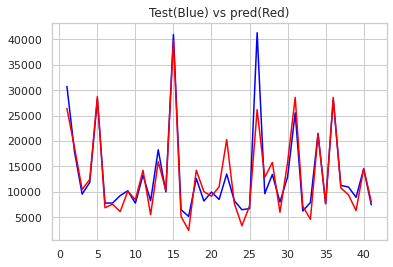

In [ ]:
c = [i for i in range(1,42,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, predicted_value,color = 'red')
plt.title('Test(Blue) vs pred(Red)')

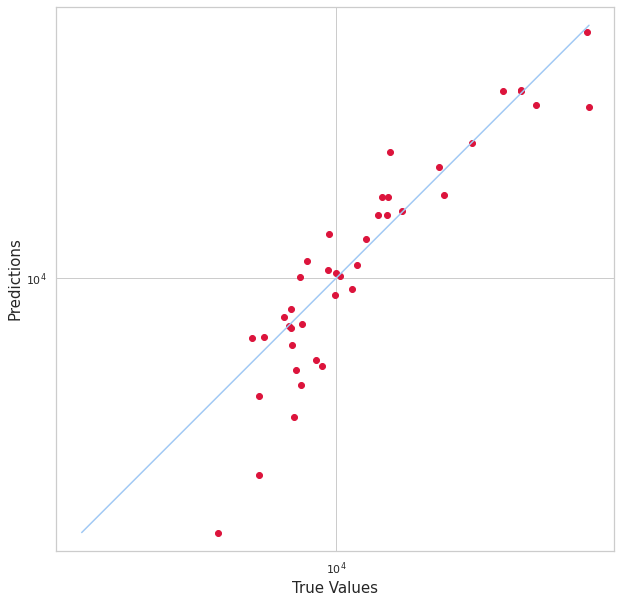

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(y_test))
p2 = min(min(predicted_value), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()